Rami, Nicola Srour (2025)

title: Product performance, MLP classification

In [ ]:
# import needed libraries
import pandas as pd
import sklearn.model_selection
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("ecommerce_product_performance.csv")
df.head(3)

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,3.0,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,19.0,0.056410,4.0


In [ ]:
# remove irrelevant columns
df = df.drop(['Number_of_Reviews'], axis=1)
# remove duplicates
df = df.drop_duplicates()
# remove null values
df = df.dropna()
df.head(2)

,Product_Price,Discount_Rate,Product_Rating,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,1.0,3.0,0.384639,10.0


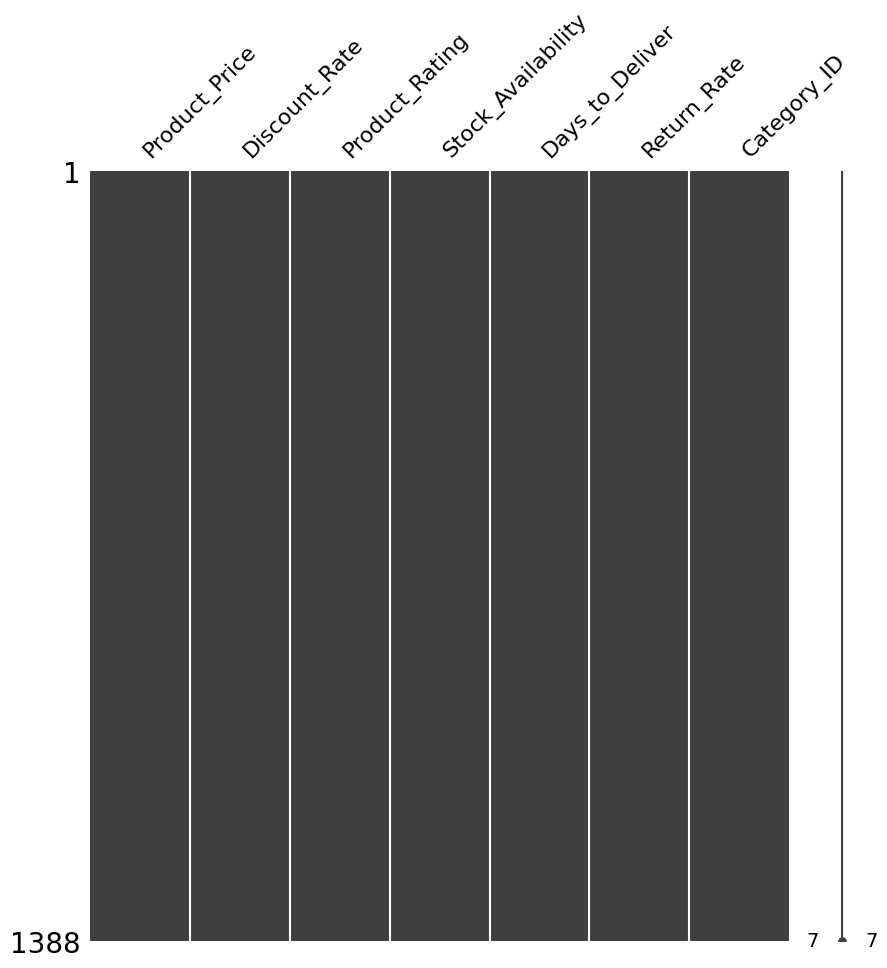

In [ ]:
# make sure no null values remain
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

In [ ]:
# see the statistics in the numerical columns in the dataset
df.describe()

,Product_Price,Discount_Rate,Product_Rating,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,156.757309,0.282510,3.742411,0.898415,15.507925,0.328548,5.570605
std,93.723502,0.158312,0.884051,0.302211,8.586341,0.175410,2.840139
min,5.000000,0.006476,1.000000,0.000000,1.000000,0.006528,1.000000
25%,85.800925,0.162763,3.123694,1.000000,8.000000,0.192650,3.000000
50%,154.600419,0.256735,3.767932,1.000000,15.000000,0.310020,6.000000
75%,217.558345,0.385802,4.447725,1.000000,23.000000,0.438205,8.000000
max,535.273149,0.800000,5.000000,1.000000,30.000000,0.900000,10.000000


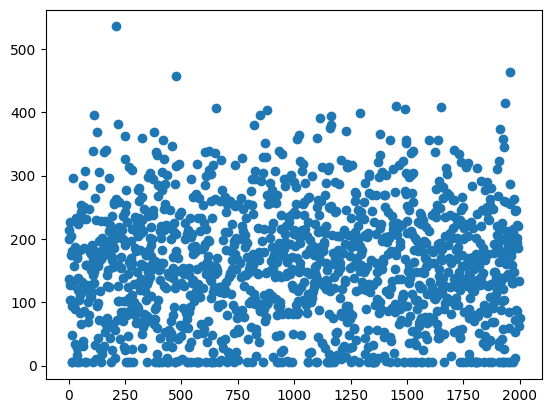

In [ ]:
# use scatter plot to remove outliers

plt.scatter(df.index, df['Product_Price'])
plt.show()

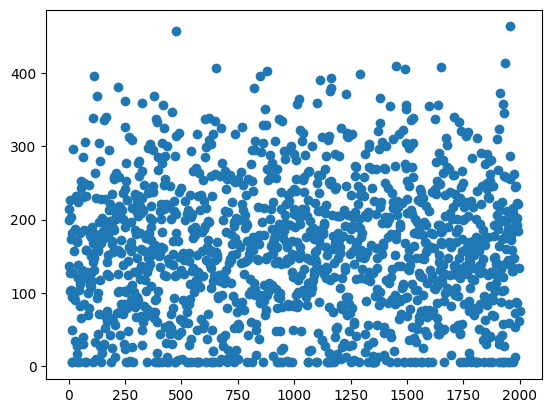

In [ ]:
df = df[df['Product_Price'] < 500]
plt.scatter(df.index, df['Product_Price'])
plt.show()

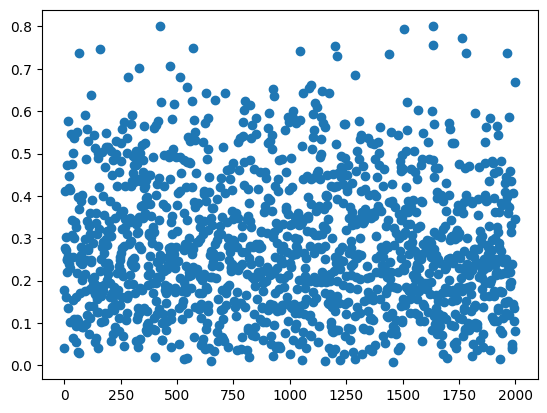

In [ ]:
plt.scatter(df.index, df['Discount_Rate'])
plt.show()

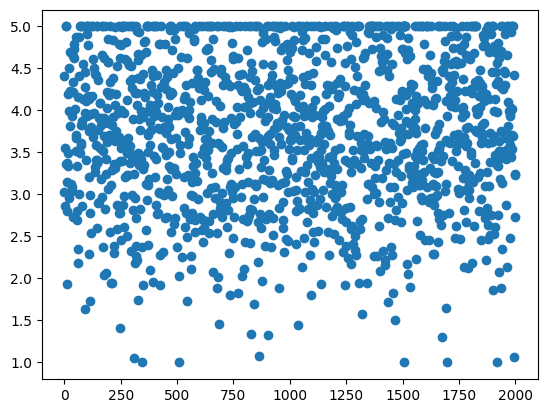

In [ ]:
plt.scatter(df.index, df['Product_Rating'])
plt.show()

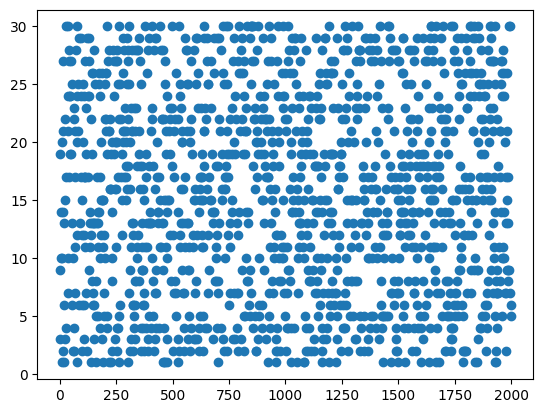

In [ ]:
plt.scatter(df.index, df['Days_to_Deliver'])
plt.show()

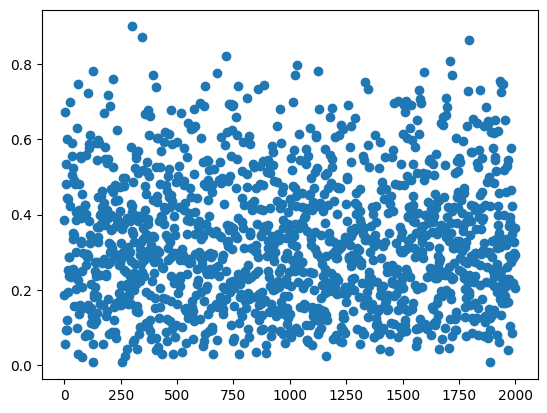

In [ ]:
plt.scatter(df.index, df['Return_Rate'])
plt.show()

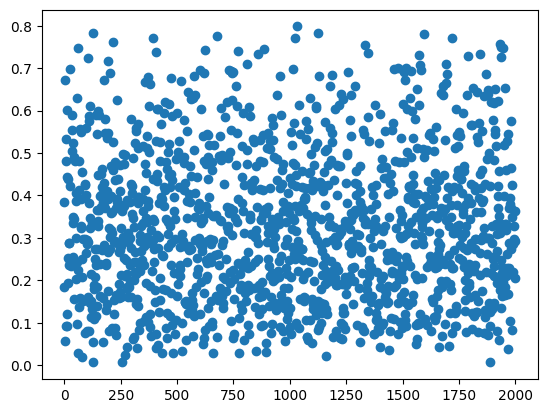

In [ ]:
df = df[df['Return_Rate'] < 0.8]
plt.scatter(df.index, df['Return_Rate'])
plt.show()

In [ ]:
# findning unique values in each column with cateogrical values to know which encoding method to use
uniqueCat = df['Category_ID'].nunique()
uniqueStock = df['Stock_Availability'].nunique()
print(uniqueCat, uniqueStock)

10 2


In [ ]:
# see types of columns
df.dtypes

,0
Product_Price,float64
Discount_Rate,float64
Product_Rating,float64
Stock_Availability,float64
Days_to_Deliver,float64
Return_Rate,float64
Category_ID,float64


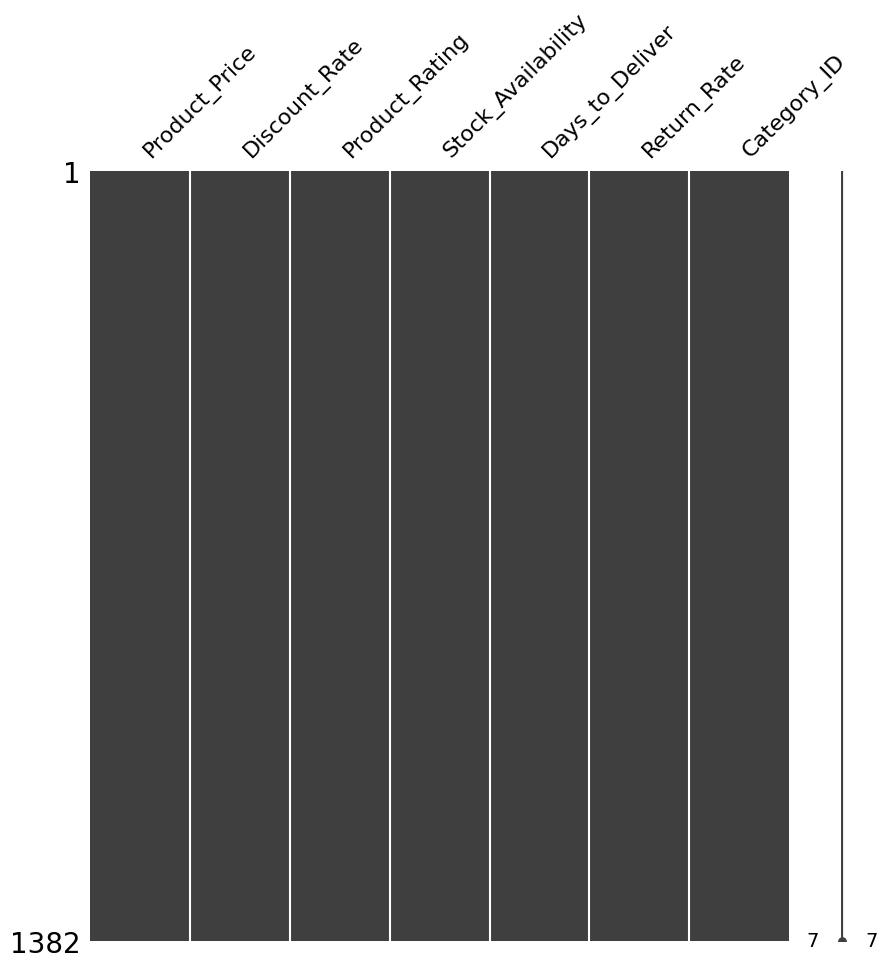

In [ ]:
# make sure again no null values exist
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

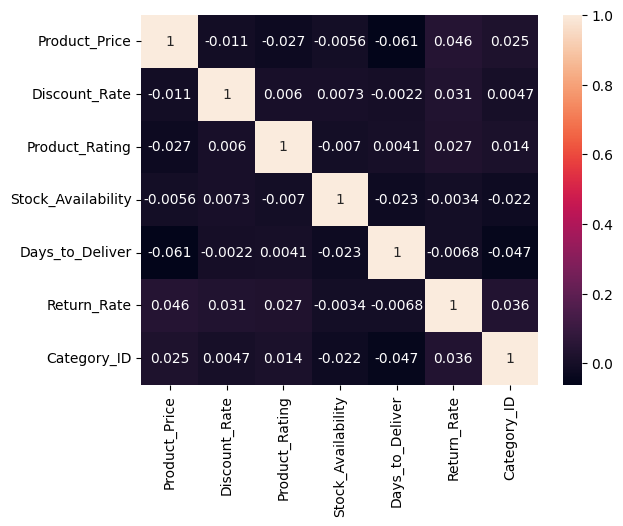

In [ ]:
# find correlation matrix

corrmatrix =  df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

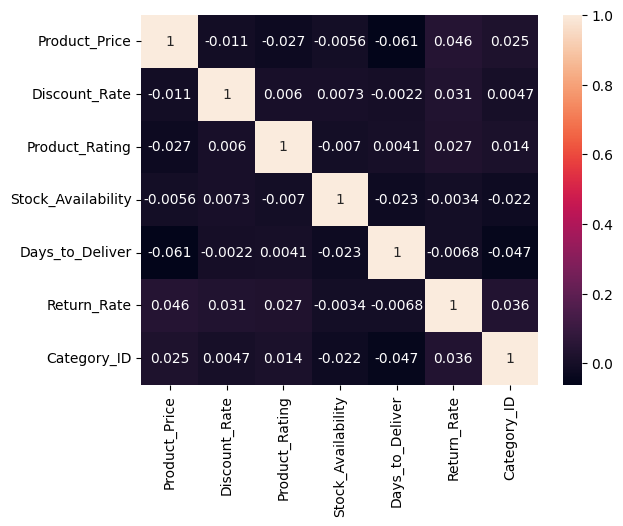

In [ ]:
# find correlation matrix

corrmatrix =  df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
x = df.drop(['Category_ID'], axis=1)
y = df['Category_ID']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (1382, 7)
x_train: (1036, 6)
y_train: (1036,)
x_test: (346, 6)
y_test: (346,)


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
y_predicted = clf.predict(x_test)
acc = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(acc)

0.09248554913294797


In [ ]:
ypredprob = clf.predict_proba(x_test)
roc = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovo')
roc2 = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovr')
print(roc, roc2)

0.47813112499813265 0.4780955982424572


Reference:
Yildiz. E, (2025), E-Commerce Product Performance Dataset, Kaggle, Available at: https://www.kaggle.com/datasets/efeyldz/e-commerce-product-performance-dataset, (Accessed: 19/05/2025)